# 경사하강법이란?

- 손실을 줄이는 알고리즘
- 기울기가 최소가 되는 점을 찾아서 알맞은 가중치를 찾아내는 것
- 손실함수를 최적화하는 방법중 하나다

## 점신적인 학습 or 온라인 학습

# 확률적 경사 하강법(SGD)
- 학률적 : 런덤하게
- 경사   : 기울기 
- 하강법 : 손실을 최소화하게 내려가는 방법

In [1]:
# 어떻게 길을 찾아? 기율기 훈련데이터를 이용함,
# 데이터를 다 사용했고 못내려오면 
# 백치사이즈 : 스탭

# 뷴류에서 손실 : 분류 잘못된 것 (줄이는 방법 로지스틱)

# 딥러닝 : 크로스 앰트로피 (이진분류 때)
# MSE : RMSE 

In [2]:
# 평가 지표 : 혼동(오차) 행렬

## 필수 라이브러리 로딩

In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='malgun gothic')

# 시각화 차트에 음수설정
mpl.rc('axes', unicode_minus = False)

# 오류경고
warnings.filterwarnings('ignore')

## 훈련데티어 로딩

In [4]:
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
# target 고유값
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
# Species를 제외한 나머지 특성은 입력 데이터
# Species는 타긱 데이터

fish_input = fish[['Weight', 'Length','Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

## 특성 전처리와 훈련세트, 테스트 세트분리
- 특성 스케링

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 훈련세트와 테스트세트 분리
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42)

# 표준화
ss = StandardScaler()
ss.fit(train_input) # 비지도학습 : 정답이 없으니까

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 확률적 경사 하상법으로 훈련

In [20]:
# SGDClassifier 클래스 : 확률적 경사 하강법을 제공하는 분류용 클래스
from sklearn.linear_model import SGDClassifier 

# 변수에 하이버파라미터

# loss function(손실함수) : 손실 함수의 종류를 지정하는 매개변스(loss)
## 이진분류회긔 : 이진크로스엔트로피
## 다중분류휘귀 : 크로스엔트로피 , 소프트맥스

# max_iter : 수행할 애포크 횟수

#                     로직함수   전체훈련세트 사용하는 것을 애포크 
sc = SGDClassifier(loss = 'log', max_iter=10, random_state=42) # 이진분류
sc.fit(train_scaled, train_target)


# 평가
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


In [21]:
# 모델을 이어서 훈련할 때 partial_fit() 병형 학습

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 가장 적절한 에포크 횟수 찾기

- 애포크 횟수가 적어 모델이 훈련세트를 덜 학습하면 과속적합이 발생한다
- 너무 많은 에포크 횟수는 과대적합된 모델일 가능성이 높다.

In [22]:
# sc.partial_fit()를 사용해 적절한 애포크 횟수 찾기

sc = SGDClassifier(loss = 'log', random_state=42)

train_score = []
test_score = []

# sc.partial_fit()만 사용하려면 훈련세트의 전체 클래스(target)의 래이블에 전달해줘야 한다
classes = np.unique(train_target) 

# 300번의 애포크 동안 훈련을 반복하여 진행
for _ in range(0, 300) :
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

## 에포크 횟수에 따른 점수 시각화 작업

In [23]:
import seaborn as sns

# 차트 스타일지정     글꼴                    음수처리                        눈금
sns.set(font = 'malgun ghthic', rc={'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize=(10, 8))

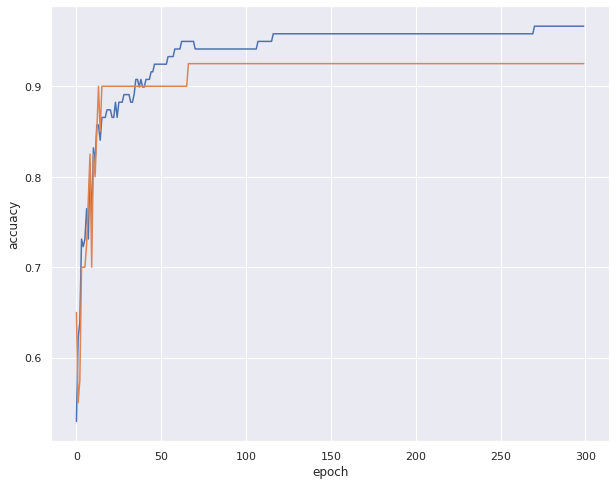

In [24]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuacy')
plt.show()

In [18]:
# 조기 종류 가능 : 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈추는 기능
# tol : 향상될 최소값을 지정하는 매개변수로 None으로 값을 주면 자종으로 멈추지 않고 max_iter횟수 만큼 무조건 반복됨

sc = SGDClassifier(loss = 'log', max_iter=100, tol = None, random_state=42) # 이진분류
# 세포트 백터 머신(SVM) 알고리즘에서 사용되는 손실함수의 기본값은 hinge

sc.fit(train_scaled, train_target)


# 평가
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
